In [41]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import seaborn as sns
import datetime  

from sklearn.ensemble import AdaBoostClassifier  #Ada algorithm

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
#from xgboost.sklearn import XGBClassifier # Extrame GB
#from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation
from sklearn.metrics import confusion_matrix, classification_report
                                    # Differnt metrics to evaluate the model 
#import pandas_profiling as pp   # simple and fast exploratory data analysis of a Pandas Datafram

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1

In [42]:
employee = pd.read_csv(r"C:\Users\SNEHA\Desktop\Machine learning\Boosting\employee (1).csv")
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
print ("Rows     : " ,employee.shape[0])
print ("Columns  : " ,employee.shape[1])


Rows     :  1470
Columns  :  35


In [44]:
def summary(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()   # compute missing value and do sum 
    df_I = df.dtypes    # data infto 
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_I = df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output;

In [45]:
summary(employee)

,index,Missing Data,Unique Data,Data Types
0,Age,0,43,int64
1,Attrition,0,2,object
2,BusinessTravel,0,3,object
3,DailyRate,0,886,int64
4,Department,0,3,object
5,DistanceFromHome,0,29,int64
6,Education,0,5,int64
7,EducationField,0,6,object
8,EmployeeCount,0,1,int64
9,EmployeeNumber,0,1470,int64


In [46]:
print(employee.EmployeeCount.unique())
print(employee.EmployeeNumber.unique())
print(employee.Over18.unique())
print(employee.StandardHours.unique())

[1]
[   1    2    4 ... 2064 2065 2068]
['Y']
[80]


In [47]:
employee = employee.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [48]:
# #Employee Numeric columns
employee_num = employee[employee.select_dtypes(include=[np.number]).columns.tolist()]
employee_num.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0


In [49]:
employee_dummies = employee[employee.select_dtypes(include=['object']).columns.tolist()]
employee_dummies.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [50]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)
# label in ascending order

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1


In [51]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)

employee_combined.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,2,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,0,1,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,0,2,1,3,1,2,1,0


# Data Partition-1

In [52]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = employee_combined.drop('Attrition',axis=1)
y = employee_combined[["Attrition"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [53]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 1176.
The number of samples into the test data is 294.


# Ada Boosting

### Manual 

In [54]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=3,  #how many tree ( Stump ) we want to make 
                         learning_rate=1) # its tunning Parameter & range = 0-1
# Train Adaboost Classifer
Adamodel = abc.fit(x_train, y_train)

### Grid Search Method

In [55]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [30, 50, 100, 150],
                    'learning_rate': [0.1, 0.5, 0.4, 1]}

In [56]:
# Gridsearch the parameters to find the best parameters.
abc = AdaBoostClassifier() 
gscv_ADA = GridSearchCV(estimator=abc, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_ADA.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.4, 1],
                         'n_estimators': [30, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [57]:
print('The best parameter are -', gscv_ADA.best_params_)

The best parameter are - {'learning_rate': 0.5, 'n_estimators': 100}


In [58]:
# Re-fit the model with the best parameters
final_mod_ADA = AdaBoostClassifier(**gscv_ADA.best_params_)
final_mod_ADA.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100)

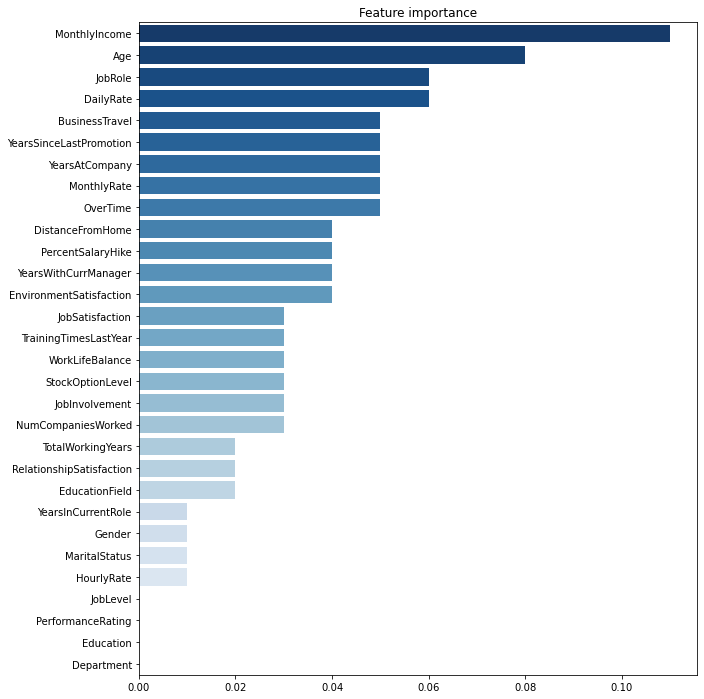

In [59]:
# Plot features importances
imp = pd.Series(data=final_mod_ADA.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_r", orient='h')

# Prediction

In [60]:
# Prediction
train_pred = final_mod_ADA.predict(x_train)
test_pred = final_mod_ADA.predict(x_test)

# Confusion Matrix Train Data 

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[986  11]
 [ 95  84]]


In [62]:
Accuracy_test=((986+84)/(1176)*100)
Accuracy_test

90.98639455782312

# Confusion Matrix Test Data 

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[229   7]
 [ 38  20]]


In [64]:
Accuracy_test=((233+9)/(294)*100)
Accuracy_test

82.31292517006803

In [65]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       997
           1       0.88      0.47      0.61       179

    accuracy                           0.91      1176
   macro avg       0.90      0.73      0.78      1176
weighted avg       0.91      0.91      0.90      1176

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       236
           1       0.74      0.34      0.47        58

    accuracy                           0.85       294
   macro avg       0.80      0.66      0.69       294
weighted avg       0.83      0.85      0.82       294



# Model 2 -GBM (Gradient boosting)

### Data Partition-2

In [66]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = employee_combined.drop('Attrition',axis=1)
y = employee_combined[["Attrition"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [67]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 1176.
The number of samples into the test data is 294.


### Model 2 -GBM (Gradient boosting)

In [68]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {
        'n_estimators': [10, 50, 100, 200, 500], # number of tress
        'max_depth': [3, 5],  # maximum branches in tree
        'min_samples_leaf': [10,15,20]  # no. of sample in  child nodes
}

In [69]:
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="exponential",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5,  # 5 time 
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  loss='exponential',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [10, 15, 20],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='accuracy', verbose=1)

In [70]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'max_depth': 3, 'min_samples_leaf': 15, 'n_estimators': 100}


In [71]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=15)

In [72]:
# Prediction
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

# Confusion Matrix Train Data (2 Model)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[997   0]
 [ 59 120]]


In [74]:
Accuracy_train=((996+123)/(1176)*100)
Accuracy_train

95.1530612244898

# Confusion Matrix Test Data (2 Model) 

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[226  10]
 [ 42  16]]


In [76]:
Accuracy_test=((227+18)/(294)*100)
Accuracy_test

83.33333333333334

In [77]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       997
           1       1.00      0.67      0.80       179

    accuracy                           0.95      1176
   macro avg       0.97      0.84      0.89      1176
weighted avg       0.95      0.95      0.95      1176

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       236
           1       0.62      0.28      0.38        58

    accuracy                           0.82       294
   macro avg       0.73      0.62      0.64       294
weighted avg       0.80      0.82      0.80       294



# Importance Feature

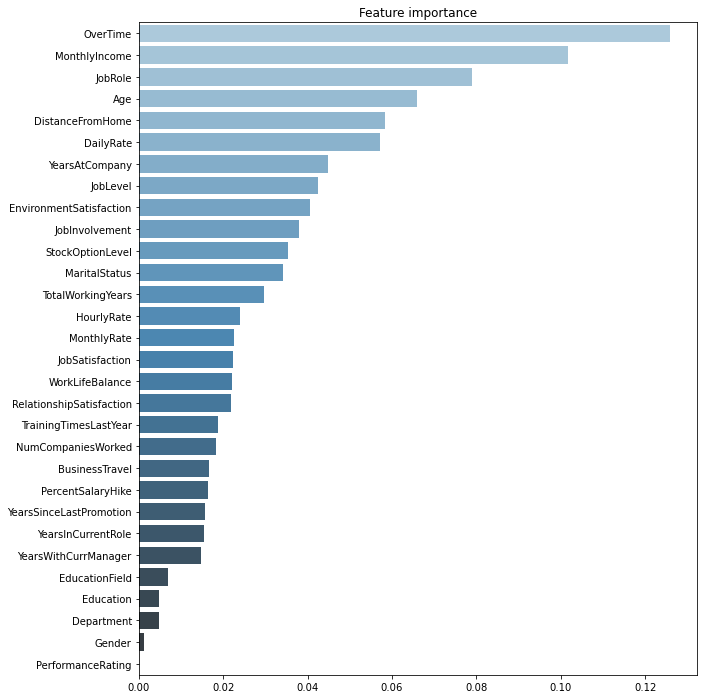

In [78]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


# Gradiant Boosting Tree

In [79]:
! pip install pydotplus

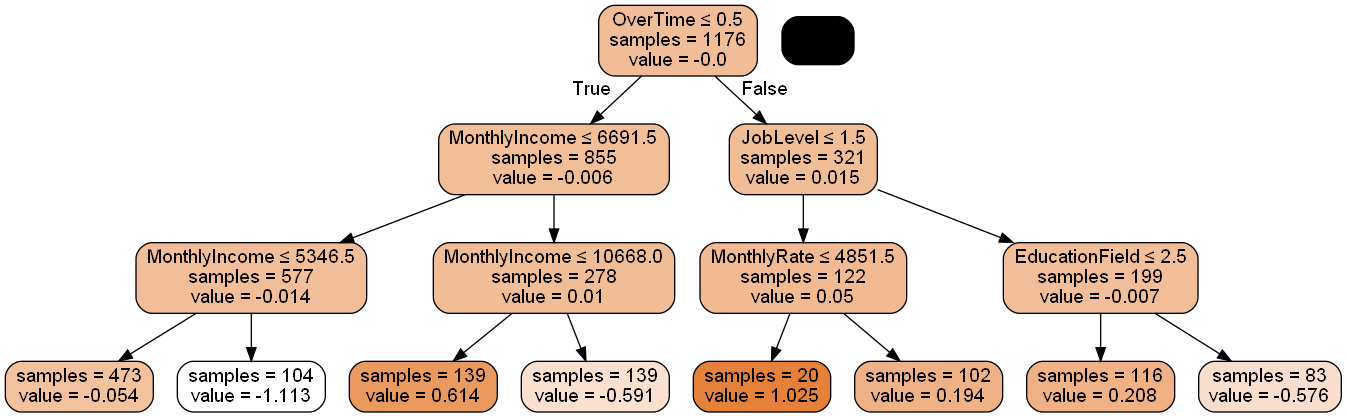

In [80]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[99, 0] #2,3,42,43
Attrition=['Yes','No']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=Attrition,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Finished